1. 

En el archivo "logistic_regression_digits" hemos visto un ejemplo multiclase. Elimina todas las imágenes y etiqueta (label) cuyo valor del label no sea 1 o 9. Es decir, elimina todos los dígitos y quédate solo con los dígitos 1 y 9.

Ahora, realiza un entrenamiento con logistic regression con los nuevos datos:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [90]:
from sklearn.datasets import load_digits
digits = load_digits() # 8x8 = 64 pixels  -- Very clean Dataset 

In [91]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [92]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

sigmoid(10)

0.9999546021312976

In [93]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [94]:
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


X_y = list(zip(digits.data, digits.target))
X_yone_nine = []
for image, target in X_y:
    if target == 1 or target == 9:
        X_yone_nine.append((image, target))
    else: continue
    print(X_yone_nine)

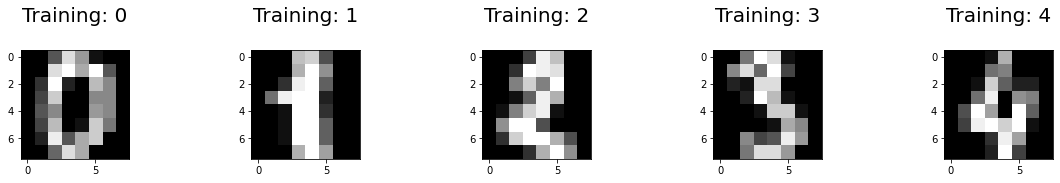

In [95]:
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [96]:
np.reshape(image, (8,8))

array([[ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  6.,  2.,  2.,  0.],
       [ 0.,  0.,  7., 15.,  0.,  9.,  8.,  0.],
       [ 0.,  5., 16., 10.,  0., 16.,  6.,  0.],
       [ 0.,  4., 15., 16., 13., 16.,  1.,  0.],
       [ 0.,  0.,  0.,  3., 15., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  4.,  0.,  0.]])

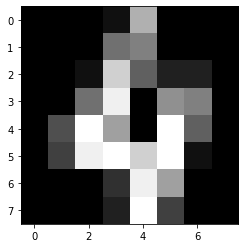

In [97]:
k = np.reshape(image, (8,8))
plt.imshow(k, cmap=plt.cm.gray)

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

In [99]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

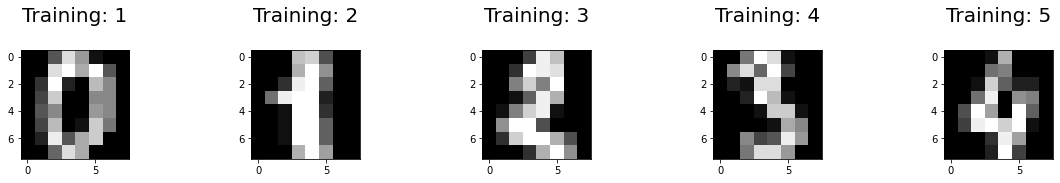

In [100]:
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[1:9])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [101]:
digits.target.shape

(1797,)

Elimina todas las imágenes y etiqueta (label) cuyo valor del label no sea 1 o 9. Es decir, elimina todos los dígitos y quédate solo con los dígitos 1 y 9.

Ahora, realiza un entrenamiento con logistic regression con los nuevos datos:

¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?
LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

In [126]:
import pandas as pd 
df = pd.DataFrame(data= np.c_[digits['data'], digits['target']],
                     columns= digits['feature_names'] + ['target'])

In [127]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


In [134]:
df = df[(df.target == 1) | (df.target == 9)]
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9.0
11,0.0,0.0,0.0,0.0,14.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,13.0,16.0,1.0,0.0,1.0
19,0.0,0.0,6.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,7.0,16.0,16.0,13.0,11.0,1.0,9.0
21,0.0,0.0,0.0,2.0,16.0,16.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,12.0,15.0,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,0.0,0.0,5.0,14.0,11.0,8.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,7.0,15.0,12.0,5.0,0.0,0.0,9.0
1774,0.0,0.0,6.0,12.0,12.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,11.0,10.0,4.0,0.0,0.0,1.0
1786,0.0,0.0,4.0,14.0,15.0,6.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,4.0,13.0,15.0,9.0,0.0,0.0,9.0
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0


In [128]:
df.shape

(1797, 65)

In [135]:
y = df['target']
y

1       1.0
9       9.0
11      1.0
19      9.0
21      1.0
       ... 
1772    9.0
1774    1.0
1786    9.0
1792    9.0
1795    9.0
Name: target, Length: 362, dtype: float64

In [130]:
y.shape

(1797,)

In [173]:
X = df.iloc[:,:-1].values
X.shape

(362, 64)

In [172]:
X.shape

(362, 64)

In [117]:
X.reshape(1,-1)

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

Splitting Data into Training and Test Sets (Digits Dataset)

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [175]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

¿Se mejora la precisión del algoritmo con dos clases? 
¿por qué? 
LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

In [231]:
import sklearn.metrics as metrics
predictions = LogisticRegression(X_test)

In [232]:
from sklearn.metrics import accuracy_score

In [233]:
predictions

LogisticRegression(penalty=array([[ 0.,  1., 10., ..., 16., 11.,  0.],
       [ 0.,  0.,  0., ...,  9.,  0.,  0.],
       [ 0.,  0.,  0., ..., 15.,  6.,  0.],
       ...,
       [ 0.,  0.,  1., ..., 16., 10.,  0.],
       [ 0.,  0.,  3., ..., 16., 15., 11.],
       [ 0.,  0.,  2., ..., 12., 13.,  8.]]))

In [221]:
score = model.score(X_train, y_train)
print(score * 100, '%')

100.0 %


In [234]:
score = model.score(X_test, y_test)
print(score * 100, "%")

100.0 %


In [238]:
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

1.0


In [224]:
y_train

array([9., 9., 1., 1., 9., 1., 9., 9., 1., 9., 1., 1., 1., 1., 9., 9., 1.,
       9., 1., 1., 9., 1., 1., 9., 9., 9., 1., 1., 9., 1., 1., 1., 1., 9.,
       9., 1., 9., 9., 1., 9., 9., 1., 1., 1., 1., 9., 9., 9., 1., 1., 9.,
       9., 1., 1., 1., 1., 9., 9., 9., 9., 1., 9., 9., 1., 9., 9., 9., 9.,
       1., 1., 9., 1., 9., 9., 1., 9., 9., 9., 1., 1., 9., 9., 1., 9., 9.,
       1., 1., 9., 1., 9., 9., 1., 1., 9., 1., 9., 9., 1., 1., 1., 9., 1.,
       9., 9., 9., 1., 1., 9., 1., 1., 1., 9., 1., 9., 1., 9., 9., 9., 9.,
       1., 9., 9., 1., 9., 1., 1., 9., 1., 1., 9., 9., 1., 9., 1., 1., 1.,
       1., 1., 9., 1., 1., 9., 1., 9., 1., 1., 1., 1., 9., 1., 1., 1., 1.,
       9., 9., 1., 9., 1., 1., 9., 9., 9., 9., 9., 1., 9., 9., 9., 1., 9.,
       1., 1., 1., 9., 1., 1., 1., 1., 1., 9., 1., 9., 1., 9., 1., 9., 1.,
       9., 1., 1., 1., 1., 9., 9., 9., 1., 1., 1., 9., 9., 9., 9., 1., 1.,
       9., 9., 9., 9., 1., 1., 1., 1., 1., 9., 9., 1., 9., 9., 9., 1., 9.,
       9., 1., 9., 9., 9.

In [239]:
y_train = np.array(y_train)

In [243]:
y_test

934     9.0
1367    1.0
221     1.0
131     1.0
1076    1.0
       ... 
1740    9.0
1152    9.0
845     9.0
586     1.0
994     1.0
Name: target, Length: 73, dtype: float64

In [244]:
y_test.shape

(73,)

In [246]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[35  0]
 [ 0 38]]


Text(0.5, 1.0, 'Accuracy Score: 1.0')

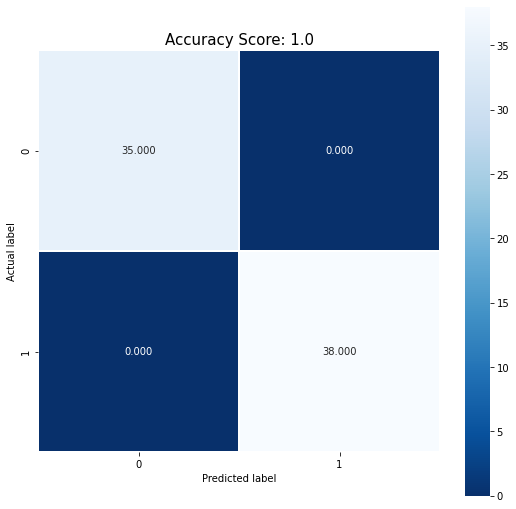

In [247]:
import seaborn as sns

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)